<a href="https://colab.research.google.com/github/emonnn13/Hand-Sign-Detection/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
#Kaggle.json file upload

from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

 78% 49.0M/62.6M [00:00<00:00, 48.5MB/s]
100% 62.6M/62.6M [00:00<00:00, 107MB/s] 


In [ ]:
!unzip *.zip

In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.rest_csv('sign_mnist_test.csv')

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

#For google colab file path 
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

#Use this on local computer
# train = pd.read_csv('sign_mnist_train.csv')
# test = pd.rest_csv('sign_mnist_test.csv')

In [ ]:
#Datasets as numpy arrays
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

Label for the image is:  6.0


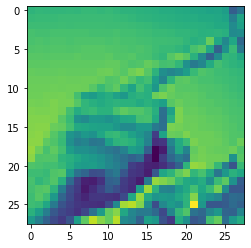

In [ ]:
#plot an images
i = 1
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", (train_data[i,0]))

In [ ]:
train.shape

(27455, 785)

In [ ]:
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
train.shape

(27455, 784)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


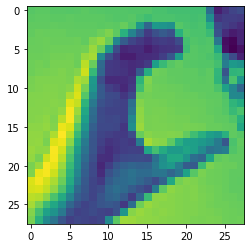

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lbz = LabelBinarizer()
labels = lbz.fit_transform(labels)
images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])
plt.imshow(images[2].reshape(28,28))
print(labels[2])

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size= 0.3, random_state=1)

In [ ]:
len(xtest)

8237

In [ ]:
#normalize
xtrain = xtrain / 255
xtest = xtest / 255
#reshaping to image data
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(24, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0

In [ ]:
model.compile(loss= keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=20, batch_size=128)

Epoch 1/20
151/151 [==============================] - 45s 11ms/step - loss: 3.0427 - accuracy: 0.0878 - val_loss: 1.5286 - val_accuracy: 0.5535
Epoch 2/20
151/151 [==============================] - 1s 6ms/step - loss: 1.5040 - accuracy: 0.4993 - val_loss: 0.7422 - val_accuracy: 0.7815
Epoch 3/20
151/151 [==============================] - 1s 6ms/step - loss: 0.8672 - accuracy: 0.7026 - val_loss: 0.4781 - val_accuracy: 0.8535
Epoch 4/20
151/151 [==============================] - 1s 6ms/step - loss: 0.5755 - accuracy: 0.8076 - val_loss: 0.2820 - val_accuracy: 0.9166
Epoch 5/20
151/151 [==============================] - 1s 7ms/step - loss: 0.4050 - accuracy: 0.8601 - val_loss: 0.1658 - val_accuracy: 0.9603
Epoch 6/20
151/151 [==============================] - 1s 6ms/step - loss: 0.2921 - accuracy: 0.9029 - val_loss: 0.1129 - val_accuracy: 0.9761
Epoch 7/20
151/151 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.9281 - val_loss: 0.0834 - val_accuracy: 0.9842
Epoc

# **Showing Training and validation loss **

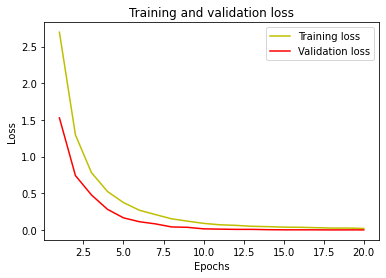

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Showing Training and Validation Accuracy

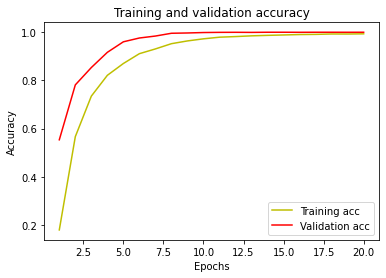

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_labels = test['label'].values
test.drop('label', axis=1, inplace=True)
test.shape

(7172, 784)

In [ ]:
test_labels = lbz.fit_transform(test_labels)
test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
pred = model.predict(test_images)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred.round())

0.9265197992191857